# Multiple Linear Regression

## Automobile  Case Study

#### Problem Statement:

A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts.  

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

1.Which variables are significant in predicting the price of a car

2.How well those variables describe the price of a car

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Import NumPy and Pandas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Step 1: Reading and Understanding the Data

##### A. Importing Csv File


In [3]:
Car = pd.read_csv("CarPrice_Assignment.csv")
Car.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


##### B. Inspect the various aspects of the housing dataframe

In [4]:
Car.shape

(205, 26)

In [5]:
Car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [6]:
Car.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


## Step 2: Data Preparation

##### A. Create New Columns

In [7]:
#Create New Columns from 'CarName' Columns :-'Company' 
      
Car['Company']=Car['CarName'].str.split(' ').str[0]

In [8]:
#Create New Columns CarSpace

Car['CarSpace']=Car['carlength']*Car['carwidth']*Car['carheight']

In [9]:
#Create New Columns Stroke/BoreRatio

Car['Stroke/BoreRatio']=Car['stroke']/Car['boreratio']  

##### B. Remove Spelling mistakes

In [10]:
# Remove spelling mistakes in Car name
def f1(x):   
    if x=='Nissan':
     return 'nissan'
    elif x=='vw':
     return 'volkswagen'
    elif x=='vokswagen':
     return 'volkswagen'
    elif x=='porcshce':
     return 'porsche'
    elif x=='toyouta':
     return 'toyota'
    elif x=='maxda':
     return 'mazda'
    else:
     return x

Car['Company']=Car['Company'].apply(lambda x : f1(x))

In [11]:
#Remove spelling mistake in drivewheel column
Car['drivewheel']=Car['drivewheel'].apply(lambda x: 'fwd' if x=='4wd' else x)

##### C. Dummy Variables

In [12]:
# Create Columns having dummy variables

Categorical_variable=['Company','symboling','fueltype','aspiration','doornumber','carbody','drivewheel','enginelocation','enginetype','cylindernumber','fuelsystem']

Dummy_Columns = pd.get_dummies(Car[Categorical_variable], drop_first = True)

In [13]:
# Add the dummy Columns to the original Car dataframe
Car = pd.concat([Car, Dummy_Columns], axis = 1)

In [14]:
# Drop Categorical as we have created the dummies for it
Car.drop(Categorical_variable, axis = 1, inplace = True)

##### D. Drop Unrequired Columns

In [15]:
Car.drop(['car_ID','CarName'], axis = 1, inplace = True)

##### E. Check the Car dataframe 

In [16]:
Car.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,...,0,0,0,0,0,0,0,1,0,0
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,...,0,0,0,0,0,0,0,1,0,0
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,...,0,0,0,0,0,0,0,1,0,0
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,...,0,0,0,0,0,0,0,1,0,0
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,...,0,0,0,0,0,0,0,1,0,0


##  Step 3. Splitting the Data into Training and Testing Sets

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
df_train, df_test = train_test_split(Car, train_size = 0.7, test_size = 0.3, random_state = 100)

## Step 4. Rescaling the Features using MinMax scaling

In [19]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [20]:
# Apply scaler() to all the columns except the numerical variables
num_vars = ['wheelbase','carlength','carwidth','carheight','curbweight','enginesize','boreratio','stroke',
            'compressionratio','horsepower','peakrpm','citympg','highwaympg','price','CarSpace','Stroke/BoreRatio']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

df_train.head()

c:\users\rohit\appdata\local\programs\python\python37\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
122,0.244828,0.426016,0.291667,0.265487,0.272692,0.139623,0.230159,0.525253,0.15000,0.083333,...,0,0,0,1,0,0,0,0,0,0
125,0.272414,0.452033,0.666667,0.212389,0.500388,0.339623,1.000000,0.464646,0.15625,0.395833,...,0,0,0,0,0,0,0,1,0,0
166,0.272414,0.448780,0.308333,0.424779,0.314973,0.139623,0.444444,0.449495,0.15000,0.266667,...,0,0,0,0,0,0,0,1,0,0
1,0.068966,0.450407,0.316667,0.088496,0.411171,0.260377,0.626984,0.247475,0.12500,0.262500,...,0,0,0,0,0,0,0,1,0,0
199,0.610345,0.775610,0.575000,0.858407,0.647401,0.260377,0.746032,0.484848,0.03125,0.475000,...,0,0,0,0,0,0,0,1,0,0


##### Dividing Train Data into X and Y sets for the model building

In [21]:
y_train = df_train.pop('price')
X_train = df_train

## Step 5. Building the model

##### A. Using Recursive feature elimination

In [22]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [23]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 10)
rfe = rfe.fit(X_train, y_train)

In [24]:
col = X_train.columns[rfe.support_]
col

Index(['carlength', 'carheight', 'curbweight', 'enginesize', 'CarSpace',
       'Company_bmw', 'Company_porsche', 'enginelocation_rear',
       'enginetype_rotor', 'cylindernumber_three'],
      dtype='object')

##### B. Building model using statsmodel, for the detailed statistics

In [25]:
import statsmodels.api as sm  

###### i. Create model with RFE selected variables

In [26]:
# Creating dataframe with RFE selected variables
X_train_rfe = X_train[col]

# Adding a constant variable 
X_train_rfe = sm.add_constant(X_train_rfe)

# Running the linear model
lm = sm.OLS(y_train,X_train_rfe).fit()  

# Print summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     142.6
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           1.17e-65
Time:                        12:58:08   Log-Likelihood:                 193.42
No. Observations:                 143   AIC:                            -364.8
Df Residuals:                     132   BIC:                            -332.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0860 

`cylindernumber_three` is insignificant in presence of other variables.  Hence Drop `cylindernumber_three` and rebuild the build

###### ii. Rebuilding model  after dropping `cylindernumber_three`

In [27]:
#Dropping the insignificant columns
X_train_rfe = X_train_rfe.drop(["cylindernumber_three"], axis = 1)

# Adding a constant variable 
X_train_rfe = sm.add_constant(X_train_rfe)

# Running the linear model
lm = sm.OLS(y_train,X_train_rfe).fit()  

# Print summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     155.2
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           4.78e-66
Time:                        12:58:08   Log-Likelihood:                 191.61
No. Observations:                 143   AIC:                            -363.2
Df Residuals:                     133   BIC:                            -333.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0930    

`Company_porsche` is insignificant in presence of other variables.  Hence Drop `Company_porsche` and rebuild the build

###### iii. Rebuilding model  after dropping `Company_porsche`

In [28]:
#Dropping the insignificant columns
X_train_rfe = X_train_rfe.drop(["Company_porsche"], axis = 1)

# Adding a constant variable 
X_train_rfe = sm.add_constant(X_train_rfe)

# Running the linear model
lm = sm.OLS(y_train,X_train_rfe).fit()  

# Print summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     171.9
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           1.46e-66
Time:                        12:58:09   Log-Likelihood:                 190.07
No. Observations:                 143   AIC:                            -362.1
Df Residuals:                     134   BIC:                            -335.5
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1146    

All columns have p-value less than 0.05 . hence lets check multicollinearity of variables

###### iii. Checking multicollinearity

In [29]:
# Dropping the constant 
X_train_rfe = X_train_rfe.drop(['const'], axis=1)

In [30]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

###### a. Calculate VIF of all variables

In [31]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,CarSpace,74.65
0,carlength,69.09
2,curbweight,60.02
3,enginesize,24.76
1,carheight,12.38
7,enginetype_rotor,1.54
5,Company_bmw,1.13
6,enginelocation_rear,1.09


`CarSpace` have very high VIF value . 

Lets drop `CarSpace` and recalculate VIF

###### b. Calculate VIF after dropping `CarSpace`

In [32]:
#Dropping the column having high VIF value
X_train_rfe = X_train_rfe.drop(["CarSpace"], axis = 1)

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,curbweight,48.72
0,carlength,40.83
3,enginesize,22.06
1,carheight,9.76
6,enginetype_rotor,1.38
4,Company_bmw,1.13
5,enginelocation_rear,1.09


`curbweight`  have very high VIF value.

Lets drop `curbweight` and recalculate VIF

###### c. Calculate VIF after dropping `curbweight`

In [33]:
#Dropping the column havinh high VIF value
X_train_rfe = X_train_rfe.drop(["curbweight"], axis = 1)

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,carlength,27.93
2,enginesize,10.74
1,carheight,9.74
5,enginetype_rotor,1.26
3,Company_bmw,1.10
4,enginelocation_rear,1.07


`carlength`  have very high VIF value.

Lets drop `carlength` and recalculate VIF

###### d. Calculate VIF after dropping `carlength`

In [34]:
#Dropping the column havinh high VIF value
X_train_rfe = X_train_rfe.drop(["carlength"], axis = 1)

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,enginesize,2.80
0,carheight,2.65
2,Company_bmw,1.10
3,enginelocation_rear,1.04
4,enginetype_rotor,1.00


######  v. Rebuild the model after dropping columns having high multicollinearity

In [35]:
# Adding a constant variable 
X_train_rfe = sm.add_constant(X_train_rfe)

 # Running the linear model
lm = sm.OLS(y_train,X_train_rfe).fit()  

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     148.4
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           1.75e-53
Time:                        12:58:10   Log-Likelihood:                 149.84
No. Observations:                 143   AIC:                            -287.7
Df Residuals:                     137   BIC:                            -269.9
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.1426    

The p-value of all the variables is less than 0.05. Hence this can be considered as good model for analysis

## Step 6. Residual Analysis of the train data

In [36]:
y_train_price = lm.predict(X_train_rfe)

Text(0.5, 0, 'Errors')

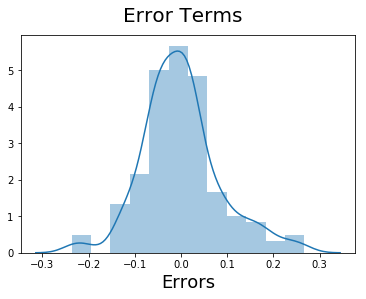

In [37]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 12)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

## Step 7 :- Making Predictions

#### A. Applying the scaling on the test sets

In [38]:
num_vars = ['wheelbase','carlength','carwidth','carheight','curbweight','enginesize','boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg','price','CarSpace','Stroke/BoreRatio']
df_test[num_vars] = scaler.transform(df_test[num_vars])

#### B. Dividing into X_test and y_test

In [39]:
y_test = df_test.pop('price')
X_test = df_test

In [40]:
#Drop constant from X_train_rfe
X_train_rfe = X_train_rfe.drop(['const'], axis=1)

In [41]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_rfe.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [42]:
# Making predictions
y_pred = lm.predict(X_test_new)

## Step 8:- Model Evaluation

Text(0, 0.5, 'y_pred')

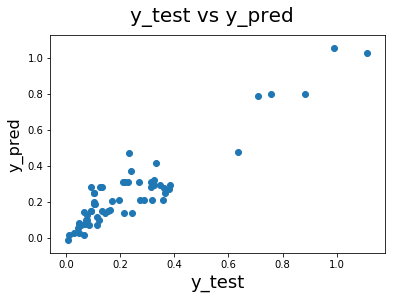

In [43]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

In [44]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8665778440796295

## Step 9:- Result Analysis

The Final  r2_score :- 0.87

### Question 1. Which variables are significant in predicting the price of a car

The variables are significant in predicting the price of a car are:-

1. enginesize (Size of Engine)         
2. Company_bmw(Cars manufactured by BMW)
3. enginelocation_rear(Cars having enginelocation as rear )
4. enginetype_rotor(Cars having enginetype as rotor)
5. carheight(Height of car)

### Question 2. How well those variables describe the price of a car

###### 1.OLS Summary

In [45]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     148.4
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           1.75e-53
Time:                        12:58:13   Log-Likelihood:                 149.84
No. Observations:                 143   AIC:                            -287.7
Df Residuals:                     137   BIC:                            -269.9
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.1426    

###### 2. Best Fit Line Equation


We can see that the equation of our best fitted line is:

$ price = 1.1926  \times  enginesize + 0.1098  \times  carheight  + 0.1870 \times Company bmw + 0.3058 \times enginelocationrear + 0.04 \times enginetyperotor  $


###### 3. Correlation Heatmap

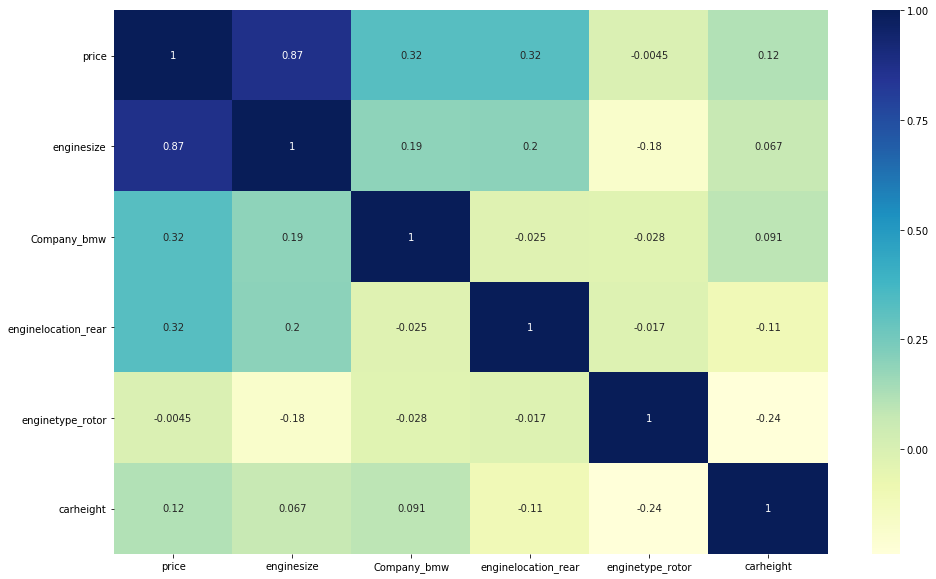

In [46]:
col=['price','enginesize','Company_bmw', 'enginelocation_rear', 'enginetype_rotor','carheight']
Car = Car[col]

plt.figure(figsize = (16, 10))
sns.heatmap(Car.corr(), annot = True, cmap="YlGnBu")
plt.show()

From Heatmap , it can be seen that enginesize impacts the car price the most, followed by car manufactured by bmw Company 